# Task-2 Cereal Rating Prediction

The main aim of cereal rating prediction is to gain insights into consumer preferences, improve products, make informed business decisions, and ultimately enhance the overall success and competitiveness of cereal products in the market.

# Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# loading the dataset


In [3]:
cereal = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\data analytics\cereal.csv')

# understanding the dataset

In [4]:
# number of rows and columns in dataset
cereal.shape

(77, 16)

In [5]:
# first 5 rows of dataset
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [6]:
# checking for null values
cereal.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

# Data Analysis and Visualization

In [7]:
# statistical measures of the dataset
cereal.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


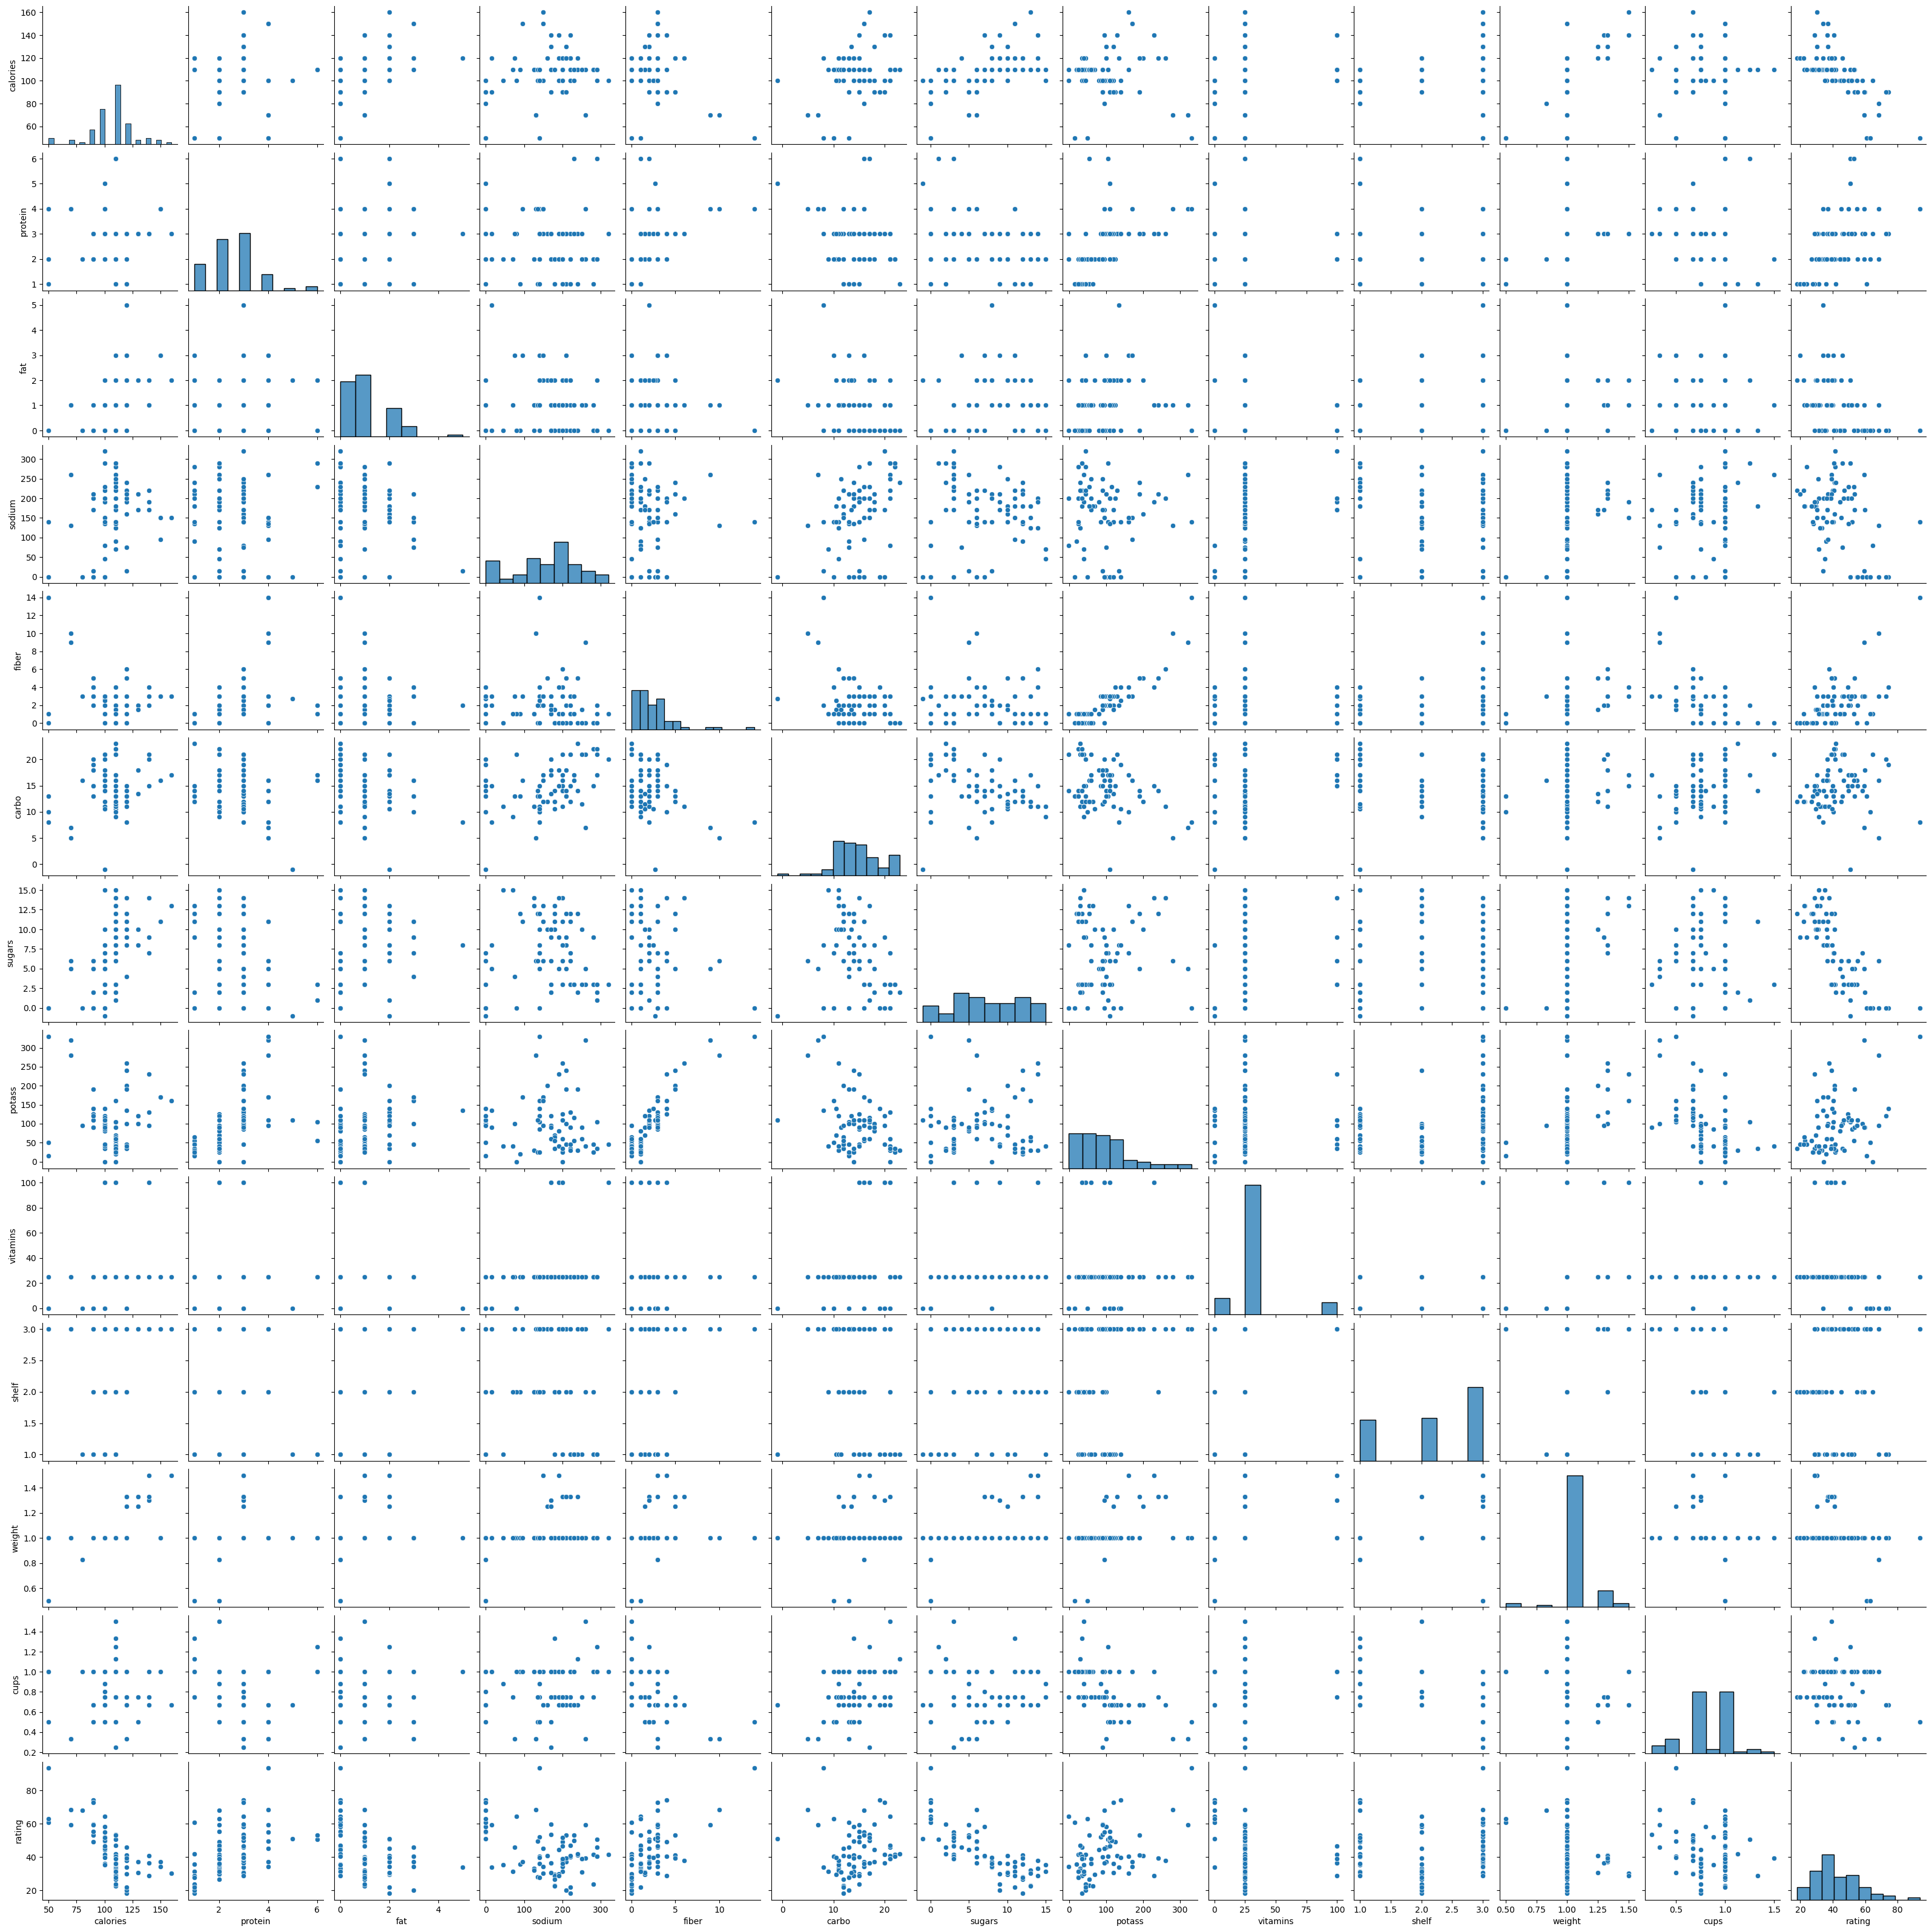

In [9]:
# number of values for each rating
sns.pairplot(cereal)

<Axes: xlabel='type', ylabel='calories'>

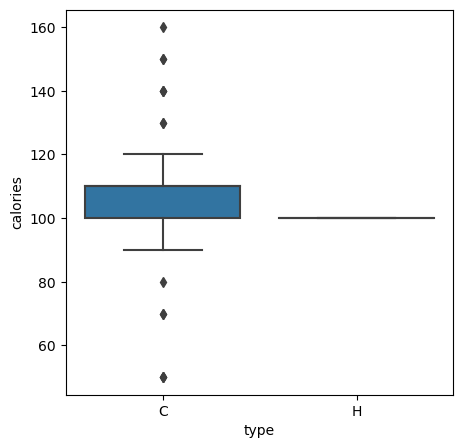

In [10]:
# type vs calories
plot=plt.figure(figsize=(5,5))
sns.boxplot(x="type",y="calories",data=cereal)

<Axes: xlabel='type', ylabel='calories'>

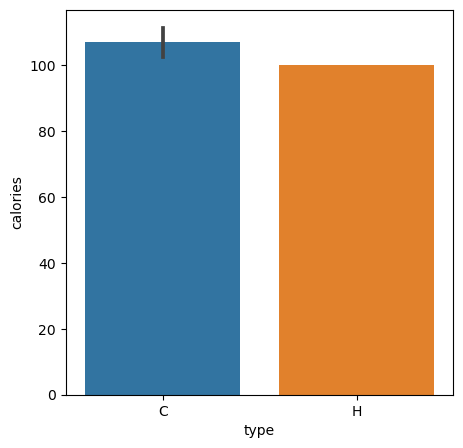

In [11]:
# type vs calories
plot=plt.figure(figsize=(5,5))
sns.barplot(x="type",y="calories",data=cereal)

<Axes: xlabel='fat', ylabel='sodium'>

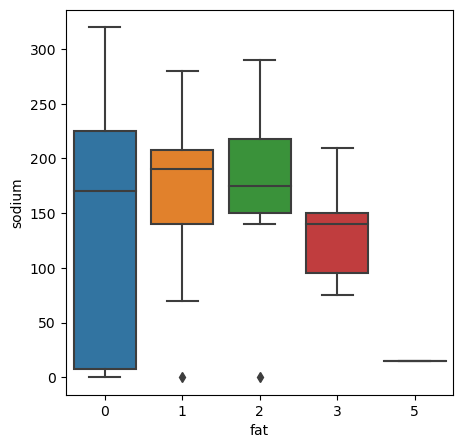

In [12]:
# fat vs sodium
plot=plt.figure(figsize=(5,5))
sns.boxplot(x="fat",y="sodium",data=cereal)

# preprocessing¶

# Negative values¶

In [14]:
(cereal==-1).sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [15]:
# replacing negative values to np.NAN
cereal = cereal.replace(-1, np.NAN)

In [16]:
cereal.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [17]:
# filling NAN values with thier columns mean value

for column in['carbo','sugars','potass']:
    cereal[column] = cereal[column].fillna(cereal[column].mean())

In [18]:
cereal.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [19]:
# Dropping the name column
cereal = cereal.drop(['name'],axis=1)

In [20]:
cereal.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,N,C,70,4,1,130,10.0,5.0,6.0,280.000000,25,3,1.0,0.33,68.402973
1,Q,C,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,33.983679
2,K,C,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,59.425505
3,K,C,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,93.704912
4,R,C,110,2,2,200,1.0,14.0,8.0,98.666667,25,3,1.0,0.75,34.384843


In [21]:
# converting characters to numerical values by using label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cereal["mfr"]=le.fit_transform(cereal["mfr"])
cereal["type"]=le.fit_transform(cereal["type"])

In [22]:
cereal.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,3,0,70,4,1,130,10.0,5.0,6.0,280.000000,25,3,1.0,0.33,68.402973
1,5,0,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,33.983679
2,2,0,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,59.425505
3,2,0,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,93.704912
4,6,0,110,2,2,200,1.0,14.0,8.0,98.666667,25,3,1.0,0.75,34.384843


In [23]:
# seperate the data and label
X=cereal.iloc[:,0:14].values  #independent variable
Y=cereal.iloc[:,14:15].values  #dependent variable

In [24]:
print(X)

[[  3.     0.    70.   ...   3.     1.     0.33]
 [  5.     0.   120.   ...   3.     1.     1.  ]
 [  2.     0.    70.   ...   3.     1.     0.33]
 ...
 [  6.     0.   100.   ...   1.     1.     0.67]
 [  1.     0.   100.   ...   1.     1.     1.  ]
 [  1.     0.   110.   ...   1.     1.     0.75]]


In [25]:
print(Y)

[[68.402973]
 [33.983679]
 [59.425505]
 [93.704912]
 [34.384843]
 [29.509541]
 [33.174094]
 [37.038562]
 [49.120253]
 [53.313813]
 [18.042851]
 [50.764999]
 [19.823573]
 [40.400208]
 [22.736446]
 [41.445019]
 [45.863324]
 [35.782791]
 [22.396513]
 [40.448772]
 [64.533816]
 [46.895644]
 [36.176196]
 [44.330856]
 [32.207582]
 [31.435973]
 [58.345141]
 [40.917047]
 [41.015492]
 [28.025765]
 [35.252444]
 [23.804043]
 [52.076897]
 [53.371007]
 [45.811716]
 [21.871292]
 [31.072217]
 [28.742414]
 [36.523683]
 [36.471512]
 [39.241114]
 [45.328074]
 [26.734515]
 [54.850917]
 [37.136863]
 [34.139765]
 [30.313351]
 [40.105965]
 [29.924285]
 [40.69232 ]
 [59.642837]
 [30.450843]
 [37.840594]
 [41.50354 ]
 [60.756112]
 [63.005645]
 [49.511874]
 [50.828392]
 [39.259197]
 [39.7034  ]
 [55.333142]
 [41.998933]
 [40.560159]
 [68.235885]
 [74.472949]
 [72.801787]
 [31.230054]
 [53.131324]
 [59.363993]
 [38.839746]
 [28.592785]
 [46.658844]
 [39.106174]
 [27.753301]
 [49.787445]
 [51.592193]
 [36.187559]

# correlation

1.positive

2.negative

In [26]:
correlation=cereal.corr()

<Axes: >

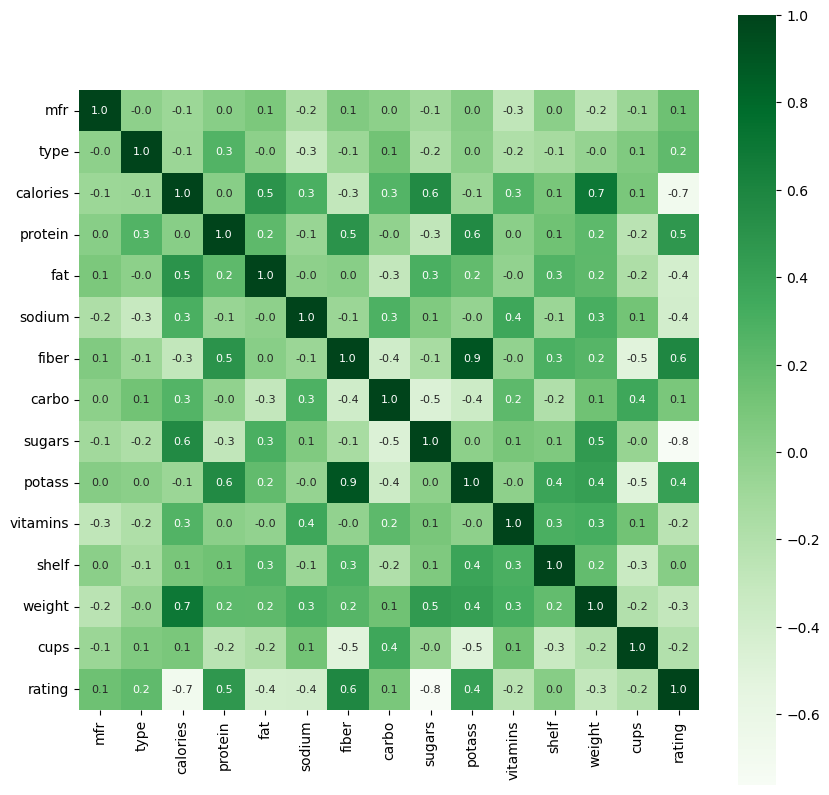

In [27]:
# constructing heatmap to understand the corr between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap="Greens")

# train & test split

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [29]:
print(Y.shape, Y_train.shape, Y_test.shape)

(77, 1) (61, 1) (16, 1)


# Model training

Linear regression

In [30]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [31]:
X_test.shape

(16, 14)

In [32]:
lr_pred=lr.predict(X_test)
lr_pred

array([[30.73207368],
       [49.47220168],
       [39.70712649],
       [61.42118446],
       [46.56189732],
       [58.16418089],
       [59.36451309],
       [55.03774829],
       [33.5341156 ],
       [38.79860389],
       [41.08637399],
       [55.74204005],
       [92.29197497],
       [26.74018594],
       [52.90341799],
       [36.40716637]])

In [33]:
Y_p=lr.predict([[0,0,70,4,1,130,10,5,6,280,25,3,1,0.33]])
Y_p

array([[67.55312831]])

In [34]:
from sklearn.metrics import r2_score
r2_score(Y_test,lr_pred)

0.997106662300009